In [ ]:
#### 1. 高斯滤波

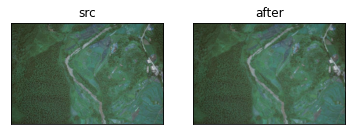

In [5]:

# AUTHOR    ：Lv Wenchao
# coding    : utf-8
# @Time     : 2022/5/3 10:50
# @FileName : gaussian_filter.py
# @Software : PyCharm
import cv2
import numpy as np

from utils import show_image


def gaussian_filter(img, sigma=1.3, K=3):
    """
    高斯滤波
    :param img: 滤波图像
    :param sigma: 标准差
    :param K: 模板大小
    :return:
    """
    k = K // 2
    if len(img.shape) == 3:
        H, W, C = img.shape

    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    out = np.pad(img.copy(), ((k, k), (k, k), (0, 0)))

    # 获取高斯卷积核
    kernel = np.zeros((K, K), np.float32)
    for x in range(-k, k + 1):
        for y in range(-k, k + 1):
            kernel[y + k, x + k] = np.exp(-(x ** 2 + y ** 2) / (2 * (sigma ** 2)))

    kernel = kernel / (2.0 * np.pi * (sigma ** 2.0))

    # 当核为整数时进行归一化
    kernel = kernel / np.sum(kernel)

    # 进行卷积操作
    temp = out.copy()
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y + k, x + k, c] = np.sum(kernel * temp[y:y + K, x:x + K, c])

    out = np.clip(out, 0, 255)

    out = out[k:H + k, k:W + k, :].astype(np.uint8)

    return out


def gaussian_filter_cv(img, sigma=1.3, K=3):
    """
    使用Opencv
    :param img:
    :param sigma:
    :param K:
    :return:
    """
    out = cv2.GaussianBlur(img, (K, K), sigma)
    return out


img = cv2.imread("../sample_data/uav/DSC00315.JPG")
gauss_filter_res = gaussian_filter_cv(img)
